#### Домашнее задание к занятию "Классификация: Логистическая регрессия и SVM"

Имеются данные adult.csv (см. в материалах к занятию).

Целевой переменной является уровень дохода income (крайний правый столбец).

Описание признаков можно найти по ссылке http://www.cs.toronto.edu/~delve/data/adult/adultDetail.html

Вам необходимо построить модели логистической регрессии и SVM, которые предсказывает уровень дохода человека.

Вывести качество полученных моделей на тестовой выборке, используя функцию score у модели.

In [1]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [2]:
data = pd.read_csv(r'C:\Users\Urmas\Desktop\Digital\НЕТОЛОГИЯ. ПРОФЕССИЯ DATA SCIENTIST\Машинное обучение\Лекции. Презентации\1\adult.csv')
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
# посмотрим инфо о таблице
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [4]:
# проверим пропуски в таком виде
data.isnull().sum()
# пропусков нет

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [5]:
# на основе каких признаков будем делать предсказания
selectedColumns = data[['workclass', 'education', 'occupation', 'gender']]

In [6]:
selectedColumns['workclass'].unique()

array(['Private', 'Local-gov', '?', 'Self-emp-not-inc', 'Federal-gov',
       'State-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [7]:
selectedColumns['workclass'].nunique()

9

In [8]:
selectedColumns['education'].unique()

array(['11th', 'HS-grad', 'Assoc-acdm', 'Some-college', '10th',
       'Prof-school', '7th-8th', 'Bachelors', 'Masters', 'Doctorate',
       '5th-6th', 'Assoc-voc', '9th', '12th', '1st-4th', 'Preschool'],
      dtype=object)

In [9]:
selectedColumns['education'].nunique()

16

In [10]:
selectedColumns['occupation'].unique()

array(['Machine-op-inspct', 'Farming-fishing', 'Protective-serv', '?',
       'Other-service', 'Prof-specialty', 'Craft-repair', 'Adm-clerical',
       'Exec-managerial', 'Tech-support', 'Sales', 'Priv-house-serv',
       'Transport-moving', 'Handlers-cleaners', 'Armed-Forces'],
      dtype=object)

In [11]:
selectedColumns['occupation'].nunique()

15

In [12]:
selectedColumns['gender'].unique()

array(['Male', 'Female'], dtype=object)

In [13]:
selectedColumns['gender'].nunique()

2

In [14]:
# все наши выбранные признаки являются категориальными переменными
# переведем столбцы в значения 0 и 1, добавив столбцы с соответствующими значениями

X = pd.get_dummies(selectedColumns, columns = ['workclass', 'education', 'occupation', 'gender'])
X.head()

,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_10th,...,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,gender_Female,gender_Male
0,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [15]:
# целевая переменная income снова является категориальной
# переведем значения столбца в числа, оставив один столбец

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [16]:
le.fit(data['income'])

LabelEncoder()

In [17]:
le.classes_

array(['<=50K', '>50K'], dtype=object)

In [18]:
# записываем в переменную y преобразованный столбец y
y = pd.Series(data = le.transform(data['income']))
y.head()

0    0
1    0
2    1
3    1
4    0
dtype: int32

In [19]:
#нормализуем (масштабируем) наши данные. В данном случае нет необходимости
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pipe_model = make_pipeline(StandardScaler(),LogisticRegression(max_iter=1000))

sc = StandardScaler()


X = pd.DataFrame(sc.fit_transform(X))
X.head()

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,-0.246558,-0.173795,-0.261940,-0.01431,0.663711,-0.189609,-0.293019,-0.205606,-0.02074,-0.171088,...,3.893860,-0.334803,-0.070565,-0.380322,-0.143316,-0.356373,-0.174668,-0.225076,-0.70422,0.70422
1,-0.246558,-0.173795,-0.261940,-0.01431,0.663711,-0.189609,-0.293019,-0.205606,-0.02074,-0.171088,...,-0.256815,-0.334803,-0.070565,-0.380322,-0.143316,-0.356373,-0.174668,-0.225076,-0.70422,0.70422
2,-0.246558,-0.173795,3.817672,-0.01431,-1.506680,-0.189609,-0.293019,-0.205606,-0.02074,-0.171088,...,-0.256815,-0.334803,-0.070565,-0.380322,6.977584,-0.356373,-0.174668,-0.225076,-0.70422,0.70422
3,-0.246558,-0.173795,-0.261940,-0.01431,0.663711,-0.189609,-0.293019,-0.205606,-0.02074,-0.171088,...,3.893860,-0.334803,-0.070565,-0.380322,-0.143316,-0.356373,-0.174668,-0.225076,-0.70422,0.70422
4,4.055836,-0.173795,-0.261940,-0.01431,-1.506680,-0.189609,-0.293019,-0.205606,-0.02074,-0.171088,...,-0.256815,-0.334803,-0.070565,-0.380322,-0.143316,-0.356373,-0.174668,-0.225076,1.42001,-1.42001


In [20]:
# разделим наши данные X на обучаемую и тестовую части

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [21]:
# наши модели
model = pipe_model    # логистическая регрессия
# model = LogisticRegression()  # или так, без стандартизации

model2 = SVC(kernel='poly', degree=7)   # SVM
# model2 = make_pipeline(StandardScaler(), SVC(gamma='auto'))  # или так

In [22]:
# обучаем модели на тренировочной части

model.fit( X_train, y_train )
model2.fit( X_train, y_train )

SVC(degree=7, kernel='poly')

In [23]:
# делаем предсказания (прогноз) на тестовой части

model.predict(X_test)
predictions = model.predict_proba(X_test)  # предсказание вероятности логистической регрессии

model2.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [24]:
# смотрим разницу факта, прогноза
result = pd.DataFrame([y_test, model.predict(X_test)]).T
result2 = pd.DataFrame([y_test, model2.predict(X_test)]).T
result, result2

(         0    1
 7762   0.0  0.0
 23881  0.0  NaN
 30507  1.0  NaN
 28911  0.0  NaN
 19484  0.0  NaN
 ...    ...  ...
 15938  0.0  NaN
 27828  0.0  NaN
 28449  0.0  NaN
 5647   0.0  0.0
 27058  0.0  NaN
 
 [14653 rows x 2 columns],
          0    1
 7762   0.0  0.0
 23881  0.0  NaN
 30507  1.0  NaN
 28911  0.0  NaN
 19484  0.0  NaN
 ...    ...  ...
 15938  0.0  NaN
 27828  0.0  NaN
 28449  0.0  NaN
 5647   0.0  0.0
 27058  0.0  NaN
 
 [14653 rows x 2 columns])

Оценим качество моделей на тренировочных и тестовых данных (в задании только тестовые)

Напомним, наши модели были стандартизированы

In [25]:
# логистическая регрессия
model.score(X_train, y_train), model.score(X_test, y_test)

(0.797741963789523, 0.8009281375827476)

In [26]:
# SVM
model2.score(X_train, y_train), model2.score(X_test, y_test)

(0.795314282371523, 0.792124479628745)

In [27]:
predictions = model.predict_proba(X_test)
predictions

array([[0.97902525, 0.02097475],
       [0.77528156, 0.22471844],
       [0.76028048, 0.23971952],
       ...,
       [0.94873393, 0.05126607],
       [0.74952897, 0.25047103],
       [0.92606248, 0.07393752]])

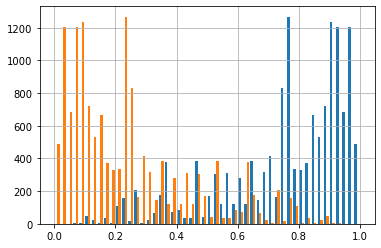

In [28]:
# визуализируем предсказание вероятности
import matplotlib.pyplot as plt

plt.hist(predictions, bins=50)
plt.grid()

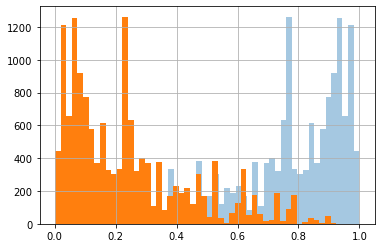

In [29]:
plt.hist(predictions[:, 0], bins=50, alpha=0.4)
plt.hist(predictions[:, 1], bins=50)
plt.grid()